In [1]:
# try:
#   # This command only in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
import tensorflow as tf

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Get project files
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

# !unzip cats_and_dogs.zip

PATH = '.\cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
test_dir

'.\\cats_and_dogs\\test'

In [4]:
# 3
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)
val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)
test_data_gen = train_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=50,
    classes=['.'],
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


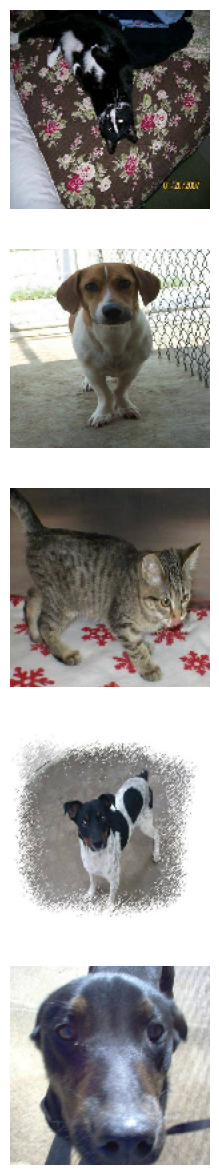

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


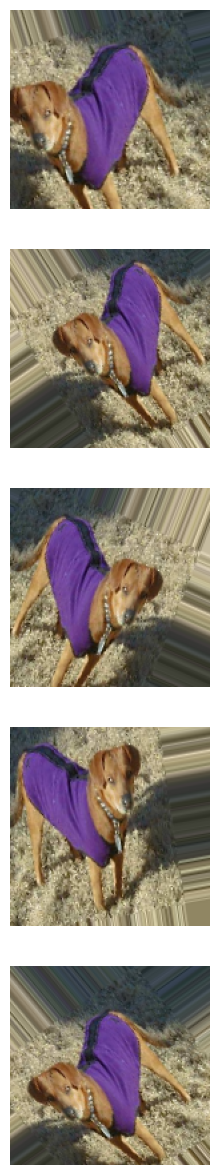

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
 
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
]) 

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [9]:
# 8

# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_accuracy',
#     min_delta=0,
#     patience=5,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=True,
# )

history = model.fit(
    train_data_gen,
    steps_per_epoch=15,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=10,
    # callbacks=[early_stop]
)

Epoch 1/20
15/15 [==============================] - 9s 387ms/step - loss: 0.6952 - accuracy: 0.4931 - val_loss: 0.6913 - val_accuracy: 0.5562
Epoch 2/20
15/15 [==============================] - 5s 360ms/step - loss: 0.6937 - accuracy: 0.5171 - val_loss: 0.6972 - val_accuracy: 0.4688
Epoch 3/20
15/15 [==============================] - 6s 367ms/step - loss: 0.6916 - accuracy: 0.5203 - val_loss: 0.6963 - val_accuracy: 0.4844
Epoch 4/20
15/15 [==============================] - 5s 341ms/step - loss: 0.6897 - accuracy: 0.5406 - val_loss: 0.6847 - val_accuracy: 0.5688
Epoch 5/20
15/15 [==============================] - 5s 336ms/step - loss: 0.6800 - accuracy: 0.5668 - val_loss: 0.7086 - val_accuracy: 0.5437
Epoch 6/20
15/15 [==============================] - 5s 341ms/step - loss: 0.6874 - accuracy: 0.5262 - val_loss: 0.6706 - val_accuracy: 0.5750
Epoch 7/20
15/15 [==============================] - 5s 344ms/step - loss: 0.6792 - accuracy: 0.5518 - val_loss: 0.6573 - val_accuracy: 0.6313
Epoch 

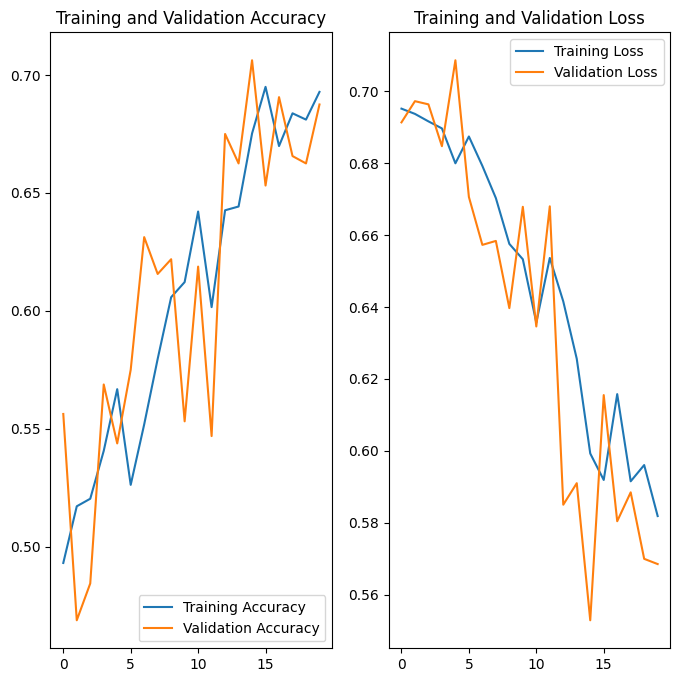

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 433ms/step


C:\Users\dlsat\AppData\Local\Temp\ipykernel_8288\759011528.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % (probability*100) + "% dog")
C:\Users\dlsat\AppData\Local\Temp\ipykernel_8288\759011528.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probability)*100) + "% cat")


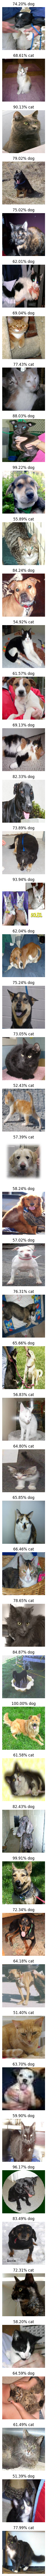

In [11]:
#10
probabilities = model.predict(test_data_gen)
plotImages(test_data_gen[0][0], probabilities=probabilities)

In [12]:
# 11
from numpy import round
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
